<a href="https://colab.research.google.com/github/Mega-737/Challenge-TelecomX-Parte-2-Prevendo-Churn/blob/main/Challenge_Telecom_X_An%C3%A1lise_de_Evas%C3%A3o_de_Clientes_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORMA√á√ÉO: Estat√≠stica e Machine Learning G8 - ONEAlura

`CHALLENGE TELECOM X: AN√ÅLISE DE EVAS√ÉO DE CLIENTES - PARTE 2`

üí° **SOBRE O DESAFIO** üí°

  `PREVENDO CHURN`

# üõ†Ô∏è PREPARA√á√ÉO DOS DADOS

## 1. Extra√ß√£o e Transforma√ß√£o dos Dados

- Importar as bibliotecas
- Carregar os dados diretamente da API utilizando Python. Diretamente do GitHub
- Validar e converter os dados para um DataFrame do Pandas para facilitar a manipula√ß√£o.
- Duplicar o banco de dados: df_original e df_trabalho
- Reconhecimento do Dataset: Estrutura e Colunas
- Verificar total de colunas, linhas e nomes, visualizar dimens√µes
- Padronizar todas as colunas para MAI√öSCULAS
- Exclus√£o das colunas que n√£o participar√£o da an√°lise de dados: CUSTOMERID,  ACCOUNT.PAPERLESSBILLING, ACCOUNT.PAYMENTMETHOD, INTERNET.INTERNETSERVICE
-  Tratamento de Inconsist√™ncias: valores ausentes, duplicados, erros de formata√ß√£o e inconsist√™ncias nas categorias.
- Print teste em planilha em Tabulate.

In [ ]:
# 1. IMPORTA√á√ÉO DAS BIBLIOTECAS ESSENCIAIS
import pandas as pd
import requests
import json
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from google.colab import files
import numpy as np

# IGNORAR MENSAGENS DE AVISO
warnings.filterwarnings("ignore")

# 2. CARREGAR OS DADOS DIRETAMENTE DO GITHUB
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# FAZER DOWNLOAD DO ARQUIVO JSON
response = requests.get(url)
data_json = response.json()

# 3. CONVERTER PARA DATAFRAME NORMALIZANDO COLUNAS ANINHADAS
df_original = pd.json_normalize(data_json)

# 4. CRIAR UMA C√ìPIA DE TRABALHO
df_trabalho = df_original.copy()

# 5. EXPLORA√á√ÉO INICIAL DOS DADOS
print("INFORMA√á√ïES INICIAIS DO DATASET:")
print(f"Total de linhas: {df_trabalho.shape[0]}")
print(f"Total de colunas: {df_trabalho.shape[1]}")
print(f"Colunas:\n{df_trabalho.columns.tolist()}")

# 6. PADRONIZAR NOMES DAS COLUNAS PARA LETRAS MAI√öSCULAS
df_trabalho.columns = df_trabalho.columns.str.upper()

# 7. EXCLUS√ÉO DE COLUNAS IRRELEVANTES PARA A AN√ÅLISE
colunas_excluir = ['CUSTOMERID', 'ACCOUNT.PAPERLESSBILLING', 'ACCOUNT.PAYMENTMETHOD', 'INTERNET.INTERNETSERVICE']
df_trabalho.drop(columns=colunas_excluir, inplace=True)

# 8. TRATAMENTO DE VALORES AUSENTES
print("\nVALORES AUSENTES POR COLUNA:")
print(df_trabalho.isnull().sum())

# 9. REMOVER LINHAS COM 'CHURN' VAZIO
df_trabalho = df_trabalho[df_trabalho['CHURN'].notna()]

# 10. CONVERTER VALORES NUM√âRICOS EM 'ACCOUNT.CHARGES.TOTAL'
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = pd.to_numeric(df_trabalho['ACCOUNT.CHARGES.TOTAL'], errors='coerce')

# 11. REMOVER DUPLICATAS (SE HOUVER)
df_trabalho.drop_duplicates(inplace=True)

# 12. FORMATAR E EXIBIR AMOSTRA DOS DADOS EM TABELA (TABULATE)
print("\nAMOSTRA DOS DADOS TRATADOS (TABULATE):")
print(tabulate(df_trabalho.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))

INFORMA√á√ïES INICIAIS DO DATASET:
Total de linhas: 7267
Total de colunas: 21
Colunas:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

VALORES AUSENTES POR COLUNA:
CHURN                        0
CUSTOMER.GENDER              0
CUSTOMER.SENIORCITIZEN       0
CUSTOMER.PARTNER             0
CUSTOMER.DEPENDENTS          0
CUSTOMER.TENURE              0
PHONE.PHONESERVICE           0
PHONE.MULTIPLELINES          0
INTERNET.ONLINESECURITY      0
INTERNET.ONLINEBACKUP        0
INTERNET.DEVICEPROTECTION    0
INTERNET.TECHSUPPORT         0
INTERNET.STREAMINGTV     

## 2. Econding

`Utilizado o m√©todo de codifica√ß√£o ONE-HOT ENCODING. `

- No internet service" e "No phone service" foram padronizados para "No".
-Os dados s√£o apresentados de forma organizada e estruturada com tabulate.
-A vari√°vel CHURN n√£o foi codificada para poder ser usada como vari√°vel alvo posteriormente.

In [ ]:
# 1. IMPORTA√á√ÉO DE FERRAMENTAS
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from tabulate import tabulate

# 2. C√ìPIA DO DATAFRAME ORIGINAL
df_encoded = df_trabalho.copy()

# 3. SUBSTITUIR 'No phone service' e 'No internet service' POR 'No'
colunas_substituir = [
    'PHONE.MULTIPLELINES',
    'INTERNET.ONLINESECURITY',
    'INTERNET.ONLINEBACKUP',
    'INTERNET.DEVICEPROTECTION',
    'INTERNET.TECHSUPPORT',
    'INTERNET.STREAMINGTV',
    'INTERNET.STREAMINGMOVIES'
]
for coluna in colunas_substituir:
    df_encoded[coluna] = df_encoded[coluna].replace(['No phone service', 'No internet service'], 'No')

# 4. CONVERS√ÉO DA COLUNA CHURN PARA BIN√ÅRIO (1 = Cliente.Evas√£o, 0 = Cliente.Ativo)
df_encoded['CHURN'] = df_encoded['CHURN'].replace({
    'Cliente.Churn/Evas√£o': 1,
    'Cliente.Churn': 1,
    'Cliente.Evas√£o': 1,
    'Churn': 1,
    'No': 1,
    'N√£o': 1,
    'Cliente.Ativo': 0,
    'Ativo': 0,
    'Yes': 0,
    'Sim': 0
})

# Converter para tipo num√©rico com seguran√ßa
df_encoded['CHURN'] = pd.to_numeric(df_encoded['CHURN'], errors='coerce')

# 5. TRATAMENTO DE VARI√ÅVEIS NUM√âRICAS (CONVERS√ÉO + IMPUTA√á√ÉO DE VALORES AUSENTES)
colunas_numericas = ['CUSTOMER.TENURE', 'ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']
for col in colunas_numericas:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

imputador = SimpleImputer(strategy='median')
df_encoded['ACCOUNT.CHARGES.TOTAL'] = imputador.fit_transform(df_encoded[['ACCOUNT.CHARGES.TOTAL']])

# 6. IDENTIFICAR VARI√ÅVEIS CATEG√ìRICAS (EXCLUINDO CHURN)
variaveis_categoricas = df_encoded.select_dtypes(include='object').columns.tolist()
if 'CHURN' in variaveis_categoricas:
    variaveis_categoricas.remove('CHURN')

# 7. ONE-HOT ENCODING
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
dados_codificados = encoder.fit_transform(df_encoded[variaveis_categoricas])
nomes_colunas = encoder.get_feature_names_out(variaveis_categoricas)
df_onehot = pd.DataFrame(dados_codificados, columns=nomes_colunas)

# 8. CONCATENAR O DATAFRAME ENCODADO
df_encoded.reset_index(drop=True, inplace=True)
df_onehot.reset_index(drop=True, inplace=True)
df_trabalho_encoded = pd.concat([df_encoded.drop(columns=variaveis_categoricas), df_onehot], axis=1)

# 9. GARANTIR QUE TODO O DATAFRAME ESTEJA NUM√âRICO
df_trabalho_encoded = df_trabalho_encoded.apply(pd.to_numeric)

# 10. VISUALIZA√á√ÉO FINAL
print("‚úÖ FORMATO FINAL DO DATAFRAME PRONTO PARA SMOTE E MODELAGEM:")
print(f"Linhas: {df_trabalho_encoded.shape[0]}")
print(f"Colunas: {df_trabalho_encoded.shape[1]}")
print("\nüîé AMOSTRA DOS DADOS TRANSFORMADOS:")
print(tabulate(df_trabalho_encoded.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


‚úÖ FORMATO FINAL DO DATAFRAME PRONTO PARA SMOTE E MODELAGEM:
Linhas: 7218
Colunas: 30

üîé AMOSTRA DOS DADOS TRANSFORMADOS:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Substitui√ß√£o de servi√ßos ausentes
colunas_substituir = [
    'PHONE.MULTIPLELINES',
    'INTERNET.ONLINESECURITY',
    'INTERNET.ONLINEBACKUP',
    'INTERNET.DEVICEPROTECTION',
    'INTERNET.TECHSUPPORT',
    'INTERNET.STREAMINGTV',
    'INTERNET.STREAMINGMOVIES'
]
for coluna in colunas_substituir:
    df_trabalho[coluna] = df_trabalho[coluna].replace(['No phone service', 'No internet service'], 'No')

# Corre√ß√£o da vari√°vel CHURN
df_trabalho['CHURN'] = df_trabalho['CHURN'].replace({
    'Cliente.Churn/Evas√£o': 1,
    'Cliente.Ativo': 0,
    'Cliente.Churn': 1,
    'Cliente.Ativo ': 0,
    'Yes': 0,
    'No': 1
}).astype('Int64')

# Convers√£o de colunas num√©ricas
colunas_numericas = ['CUSTOMER.TENURE', 'ACCOUNT.CHARGES.MONTHLY', 'ACCOUNT.CHARGES.TOTAL']
for col in colunas_numericas:
    df_trabalho[col] = pd.to_numeric(df_trabalho[col], errors='coerce')

# Imputar valores ausentes
imputador = SimpleImputer(strategy='median')
df_trabalho['ACCOUNT.CHARGES.TOTAL'] = imputador.fit_transform(df_trabalho[['ACCOUNT.CHARGES.TOTAL']])

# Encoding das vari√°veis categ√≥ricas
variaveis_categoricas = df_trabalho.select_dtypes(include='object').columns.tolist()
if 'CHURN' in variaveis_categoricas:
    variaveis_categoricas.remove('CHURN')

encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
dados_codificados = encoder.fit_transform(df_trabalho[variaveis_categoricas])
nomes_colunas = encoder.get_feature_names_out(variaveis_categoricas)
df_onehot = pd.DataFrame(dados_codificados, columns=nomes_colunas)

# Unir dados codificados ao dataframe principal
df_trabalho.reset_index(drop=True, inplace=True)
df_onehot.reset_index(drop=True, inplace=True)
df_trabalho_encoded = pd.concat([df_trabalho.drop(columns=variaveis_categoricas), df_onehot], axis=1)
df_trabalho_encoded = df_trabalho_encoded.apply(pd.to_numeric)

# Valida√ß√£o
df_trabalho_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CHURN                            6994 non-null   Int64  
 1   CUSTOMER.SENIORCITIZEN           6994 non-null   int64  
 2   CUSTOMER.TENURE                  6994 non-null   int64  
 3   ACCOUNT.CHARGES.MONTHLY          6994 non-null   float64
 4   ACCOUNT.CHARGES.TOTAL            6994 non-null   float64
 5   CUSTOMER.GENDER_Female           6994 non-null   float64
 6   CUSTOMER.GENDER_Male             6994 non-null   float64
 7   CUSTOMER.PARTNER_No              6994 non-null   float64
 8   CUSTOMER.PARTNER_Yes             6994 non-null   float64
 9   CUSTOMER.DEPENDENTS_No           6994 non-null   float64
 10  CUSTOMER.DEPENDENTS_Yes          6994 non-null   float64
 11  PHONE.PHONESERVICE_No            6994 non-null   float64
 12  PHONE.PHONESERVICE_Y

## 3. Verifica√ß√£o Da Propor√ß√£o De Evas√£o

`3.1.1. Calcule a propor√ß√£o de clientes que evadiram em rela√ß√£o aos que permaneceram ativos.`

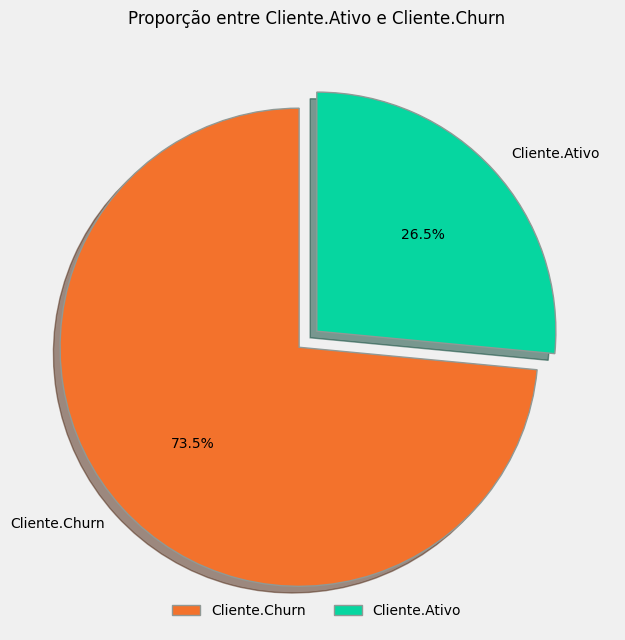

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------ CONFIGURA√á√ÉO GLOBAL DOS GR√ÅFICOS ------------------------
titulo_tamanho = 12
legenda_tamanho = 10

cores = {
    'urgente': {'cor': '#D90429', 'min': 91, 'max': 100},
    'alto_risco': {'cor': '#EF233C', 'min': 76, 'max': 90},
    'perigo': {'cor': '#F3722C', 'min': 61, 'max': 75},
    'aten√ß√£o': {'cor': '#F8961E', 'min': 46, 'max': 60},
    'baixo_risco': {'cor': '#06D6A0', 'min': 16, 'max': 45},
    'neutro': {'cor': '#118AB2', 'min': 0, 'max': 15},
    'texto': {'cor': '#264653'}
}

def obter_cor_por_porcentagem(porcentagem):
    for nivel, info in cores.items():
        if info['min'] <= porcentagem <= info['max']:
            return info['cor']
    if porcentagem > 100:
        return cores['urgente']['cor']
    elif porcentagem < 0:
        return cores['texto']['cor']
    return '#000000'

# ------------------------ 1. TRATAMENTO DA COLUNA CHURN ------------------------
df_trabalho = df_trabalho[~df_trabalho['CHURN'].isin([None, np.nan, '', ' '])].copy()

df_trabalho['CHURN'] = df_trabalho['CHURN'].replace({
    'Yes': 'Cliente.Ativo',
    'No': 'Cliente.Churn',
    0: 'Cliente.Ativo',
    1: 'Cliente.Churn',
    'Cliente.Evas√£o': 'Cliente.Churn',
    'Cliente.Churn/Evas√£o': 'Cliente.Churn'
})

# ------------------------ 2. C√ÅLCULO DE PROPOR√á√ÉO ------------------------
churn_counts = df_trabalho['CHURN'].value_counts()
total = churn_counts.sum()
percentuais = round((churn_counts / total) * 100, 1)
variaveis = churn_counts.index.tolist()
valores = churn_counts.tolist()
cores_dados = [obter_cor_por_porcentagem(p) for p in percentuais]

# ------------------------ 3. GR√ÅFICO DE PIZZA ------------------------
fig, ax = plt.subplots(figsize=(6.5, 6.5), facecolor='#f0f0f0')

explode = [0.1 if p == max(percentuais) else 0 for p in percentuais]

ax.pie(
    percentuais,
    labels=variaveis,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=cores_dados,
    wedgeprops={'edgecolor': '#909995', 'linewidth': 1}
)

ax.set_title('Propor√ß√£o entre Cliente.Ativo e Cliente.Churn', fontsize=titulo_tamanho)

# Legenda abaixo
ax.legend(variaveis, loc='lower center', fontsize=legenda_tamanho, frameon=False, ncol=2)

plt.tight_layout()
plt.show()


`3.1.2. Avalie se h√° desequil√≠brio entre as classes, o que pode impactar modelos preditivos e a an√°lise de resultados.`

In [ ]:
# 3.1.2. Avalia√ß√£o do Desequil√≠brio de Classes

# 1. GARANTIR QUE CHURN ESTEJA PADRONIZADO
df_trabalho['CHURN'] = df_trabalho['CHURN'].replace({
    'Yes': 'Cliente.Ativo',
    'No': 'Cliente.Churn',
    0: 'Cliente.Ativo',
    1: 'Cliente.Churn',
    'Cliente.Evas√£o': 'Cliente.Churn',
    'Cliente.Churn/Evas√£o': 'Cliente.Churn'
})

# 2. C√ÅLCULOS DE DESEQUIL√çBRIO
contagem_classes = df_trabalho['CHURN'].value_counts()
classe_majoritaria = contagem_classes.max()
classe_minoritaria = contagem_classes.min()

# 3. √çNDICE DE DESEQUIL√çBRIO
indice_desequilibrio = round(classe_majoritaria / classe_minoritaria, 2)

# 4. ENTROPIA DA DISTRIBUI√á√ÉO
proporcao = contagem_classes / contagem_classes.sum()
entropia = -np.sum(proporcao * np.log2(proporcao))

# 5. CLASSIFICA√á√ÉO DO DESEQUIL√çBRIO
if indice_desequilibrio <= 1.5:
    nivel_desequilibrio = 'Leve'
elif indice_desequilibrio <= 2.0:
    nivel_desequilibrio = 'Moderado'
elif indice_desequilibrio <= 3.0:
    nivel_desequilibrio = 'Desequil√≠brio Alto'
else:
    nivel_desequilibrio = 'Desequil√≠brio Severo'

# 6. EXIBI√á√ÉO PADRONIZADA
print("üîç AN√ÅLISE DE DESEQUIL√çBRIO ENTRE CLASSES\n")
print(f"Total de Clientes: {contagem_classes.sum()}")

# Exibir contagem por classe de forma robusta
for classe in contagem_classes.index:
    print(f"‚Ä¢ {classe}: {contagem_classes[classe]} clientes")

print(f"\n√çndice de Desequil√≠brio (IR): {indice_desequilibrio} ‚Üí {nivel_desequilibrio}")
print(f"Entropia da Distribui√ß√£o: {round(entropia, 3)}")


üîç AN√ÅLISE DE DESEQUIL√çBRIO ENTRE CLASSES

Total de Clientes: 6994
‚Ä¢ Cliente.Churn: 5144 clientes
‚Ä¢ Cliente.Ativo: 1850 clientes

√çndice de Desequil√≠brio (IR): 2.78 ‚Üí Desequil√≠brio Alto
Entropia da Distribui√ß√£o: 0.833


## 4. Balanceamento de Classes

- Utilizado a ferramenta `SMOTE` especialmente √∫til quando a classe minorit√°ria representa menos de 40% dos dados.

- O `StandardScaler` foi aplicado antes do SMOTE, pois dist√¢ncias entre pontos influenciam diretamente na cria√ß√£o dos exemplos sint√©ticos.

In [ ]:
# 1. IMPORTA√á√ÉO DAS BIBLIOTECAS NECESS√ÅRIAS
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 2. DEFINI√á√ÉO DAS FEATURES (X) E TARGET (y)
# Assumindo que 'CHURN' foi mapeado como 0 = Cliente.Ativo e 1 = Cliente.Churn
# e que df_trabalho_encoded cont√©m as vari√°veis dummificadas (OneHotEncoder aplicado)

X = df_trabalho_encoded.drop('CHURN', axis=1)
y = df_trabalho_encoded['CHURN']

# 3. DIVIS√ÉO ENTRE TREINAMENTO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 4. PADRONIZA√á√ÉO DAS FEATURES (OBRIGAT√ìRIO PARA USO COM O SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. APLICA√á√ÉO DO SMOTE PARA GERAR DADOS SINT√âTICOS
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# 6. VERIFICA√á√ÉO DO BALANCEAMENTO AP√ìS O SMOTE
from collections import Counter
from tabulate import tabulate

contagem_antes = Counter(y_train)
contagem_depois = Counter(y_train_bal)

tabela_balanceamento = pd.DataFrame({
    'Situa√ß√£o': ['Antes do SMOTE', 'Depois do SMOTE'],
    'Cliente.Ativo': [contagem_antes[0], contagem_depois[0]],
    'Cliente.Churn': [contagem_antes[1], contagem_depois[1]]
})

print("\nTabela de Balanceamento das Classes (antes e depois do SMOTE):\n")
print(tabulate(tabela_balanceamento, headers='keys', tablefmt='fancy_grid', showindex=False))



Tabela de Balanceamento das Classes (antes e depois do SMOTE):

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Situa√ß√£o        ‚îÇ   Cliente.Ativo ‚îÇ   Cliente.Churn ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Antes do SMOTE  ‚îÇ            1295 ‚îÇ            3600 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Depois do SMOTE ‚îÇ            3600 ‚îÇ            3600 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


##5. Normaliza√ß√£o ou Padroniza√ß√£o

`5.1.1. Avalia√ß√£o da necessidade de normalizar ou padronizar os dados, conforme os modelos que ser√£o aplicados.`

In [ ]:
# `5.1.1. Avalia√ß√£o da necessidade de normalizar ou padronizar os dados, conforme os modelos que ser√£o aplicados.`

# PADRONIZA√á√ÉO (Z-SCORE) PARA OS MODELOS QUE NECESSITAM ESCALA

from sklearn.preprocessing import StandardScaler

# Aplicar apenas nos dados de treino e teste antes do SMOTE (se ainda n√£o foi feito)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5.1.1.2. Avalia√ß√£o da necessidade de normalizar ou padronizar os dados, conforme os modelos que ser√£o aplicados.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_rf = RandomForestClassifier(random_state=42)

# 2. Treinar com os dados originais (sem padroniza√ß√£o, pois √°rvores n√£o precisam)
modelo_rf.fit(X_train, y_train)

# 3. Fazer previs√µes no conjunto de teste
y_pred = modelo_rf.predict(X_test)

# 4. Avaliar desempenho
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7946641257741782

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59       555
           1       0.84      0.88      0.86      1544

    accuracy                           0.79      2099
   macro avg       0.74      0.72      0.72      2099
weighted avg       0.79      0.79      0.79      2099


Confusion Matrix:
 [[ 304  251]
 [ 180 1364]]


`5.1.2. Modelo baseado em dist√¢ncia,Regress√£o Log√≠stica `

`5.1.3. Modelo baseado em √°rvore, Random Forest`

In [ ]:
# 5.1.2. Modelo baseado em dist√¢ncia,Regress√£o Log√≠stica

# 5.1.3. Modelo baseado em √°rvore, Random Forest

# 1. IMPORTA√á√ïES NECESS√ÅRIAS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from tabulate import tabulate

# 2. DEFINI√á√ÉO DE FEATURES E TARGET (supondo df_trabalho_encoded j√° preparado)
X = df_trabalho_encoded.drop('CHURN', axis=1)
y = df_trabalho_encoded['CHURN']

# 3. DIVIS√ÉO TREINO/TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

# 4. APLICA√á√ÉO DO SMOTE NO CONJUNTO DE TREINO
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 5. PADRONIZA√á√ÉO PARA MODELO LOG√çSTICO (aplicado AP√ìS SMOTE)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 6. TREINO RANDOM FOREST (usa dados originais, sem padroniza√ß√£o)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)
y_pred_rf = modelo_rf.predict(X_test)

# 7. TREINO REGRESS√ÉO LOG√çSTICA (usa dados padronizados)
modelo_lr = LogisticRegression(max_iter=500, random_state=42)
modelo_lr.fit(X_train_res_scaled, y_train_res)
y_pred_lr = modelo_lr.predict(X_test_scaled)

# 8. AVALIA√á√ÉO DOS MODELOS
def avaliar_modelo(nome_modelo, y_true, y_pred):
    print(f"== Avalia√ß√£o do Modelo: {nome_modelo} ==")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(tabulate(confusion_matrix(y_true, y_pred), tablefmt='fancy_grid'))
    print("\n")

avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("Regress√£o Log√≠stica", y_test, y_pred_lr)


== Avalia√ß√£o do Modelo: Random Forest ==
Accuracy: 0.7799

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.53      0.56       555
         1.0       0.84      0.87      0.85      1544

    accuracy                           0.78      2099
   macro avg       0.72      0.70      0.71      2099
weighted avg       0.77      0.78      0.78      2099

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ 296 ‚îÇ  259 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 203 ‚îÇ 1341 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


== Avalia√ß√£o do Modelo: Regress√£o Log√≠stica ==
Accuracy: 0.7432

Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.83      0.63       555
         1.0       0.92      0.71      0.80      1544

    accuracy                           0.74      2099
   macro avg       0.72      0.77      0.72      2099
weighted avg       0.81      0.7

In [ ]:
# 5.1.4. Tabela comparativas entre os modelos

from sklearn.metrics import precision_recall_fscore_support

# Fun√ß√£o para extrair m√©tricas e montar tabela comparativa
def avaliar_modelos_tabela(y_true, y_pred_rf, y_pred_lr):
    # Extrair m√©tricas para RF
    acc_rf = accuracy_score(y_true, y_pred_rf)
    prec_rf, rec_rf, f1_rf, _ = precision_recall_fscore_support(y_true, y_pred_rf, average='weighted')

    # Extrair m√©tricas para LR
    acc_lr = accuracy_score(y_true, y_pred_lr)
    prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(y_true, y_pred_lr, average='weighted')

    # Montar DataFrame resumido
    df_resultados = pd.DataFrame({
        'M√©trica': ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1-score (weighted)'],
        'Random Forest': [f"{acc_rf:.4f}", f"{prec_rf:.4f}", f"{rec_rf:.4f}", f"{f1_rf:.4f}"],
        'Regress√£o Log√≠stica': [f"{acc_lr:.4f}", f"{prec_lr:.4f}", f"{rec_lr:.4f}", f"{f1_lr:.4f}"]
    })

    print(tabulate(df_resultados, headers='keys', tablefmt='fancy_grid', showindex=False))

# Usar fun√ß√£o para exibir tabela
avaliar_modelos_tabela(y_test, y_pred_rf, y_pred_lr)


‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ M√©trica              ‚îÇ   Random Forest ‚îÇ   Regress√£o Log√≠stica ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy             ‚îÇ          0.7799 ‚îÇ                0.7432 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision (weighted) ‚îÇ          0.7734 ‚îÇ                0.8127 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

# üéØ CORRELA√á√ÉO E SELE√á√ÉO DE VARI√ÅVEIS

## 1.	An√°lise de Correla√ß√£o

`Objetivo identificar o modelo preditivo. An√°lise somente as colunas.`

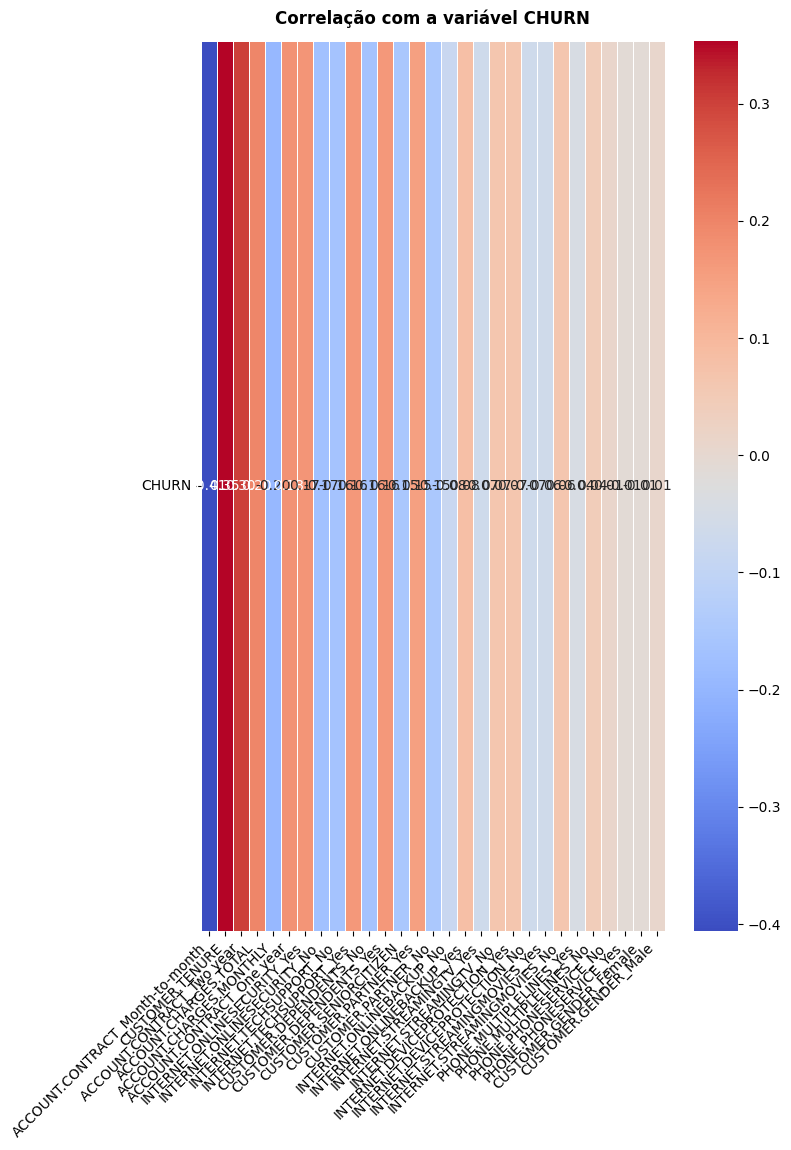

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selecionar apenas as vari√°veis num√©ricas
variaveis_numericas = df_trabalho_encoded.select_dtypes(include=['int64', 'float64'])

# 2. Matriz de correla√ß√£o
matriz_correlacao = variaveis_numericas.corr()

# 3. Organizar com foco nas maiores correla√ß√µes com CHURN
correlacoes_churn = matriz_correlacao[['CHURN']].sort_values(by='CHURN', key=abs, ascending=False).drop('CHURN')

# 4. Heatmap com visual limpo e r√≥tulos internos
plt.figure(figsize=(8, 0.4 * len(correlacoes_churn)))
sns.heatmap(correlacoes_churn.T,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar=True,
            annot_kws={"size": 10})

plt.title("Correla√ß√£o com a vari√°vel CHURN", fontsize=12, weight='bold', pad=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2. An√°lises Direcionadas

`Investiga√ß√£o com vari√°veis espec√≠ficas que se relacionam com a evas√£o:`

1. ACCOUNT.CONTRACT √ó Evas√£o

2. ACCOUNT.CHARGES.MONTHLY √ó CUSTOMER.GENDER  √ó  Evas√£o

3. Servi√ßos √ó Evas√£o

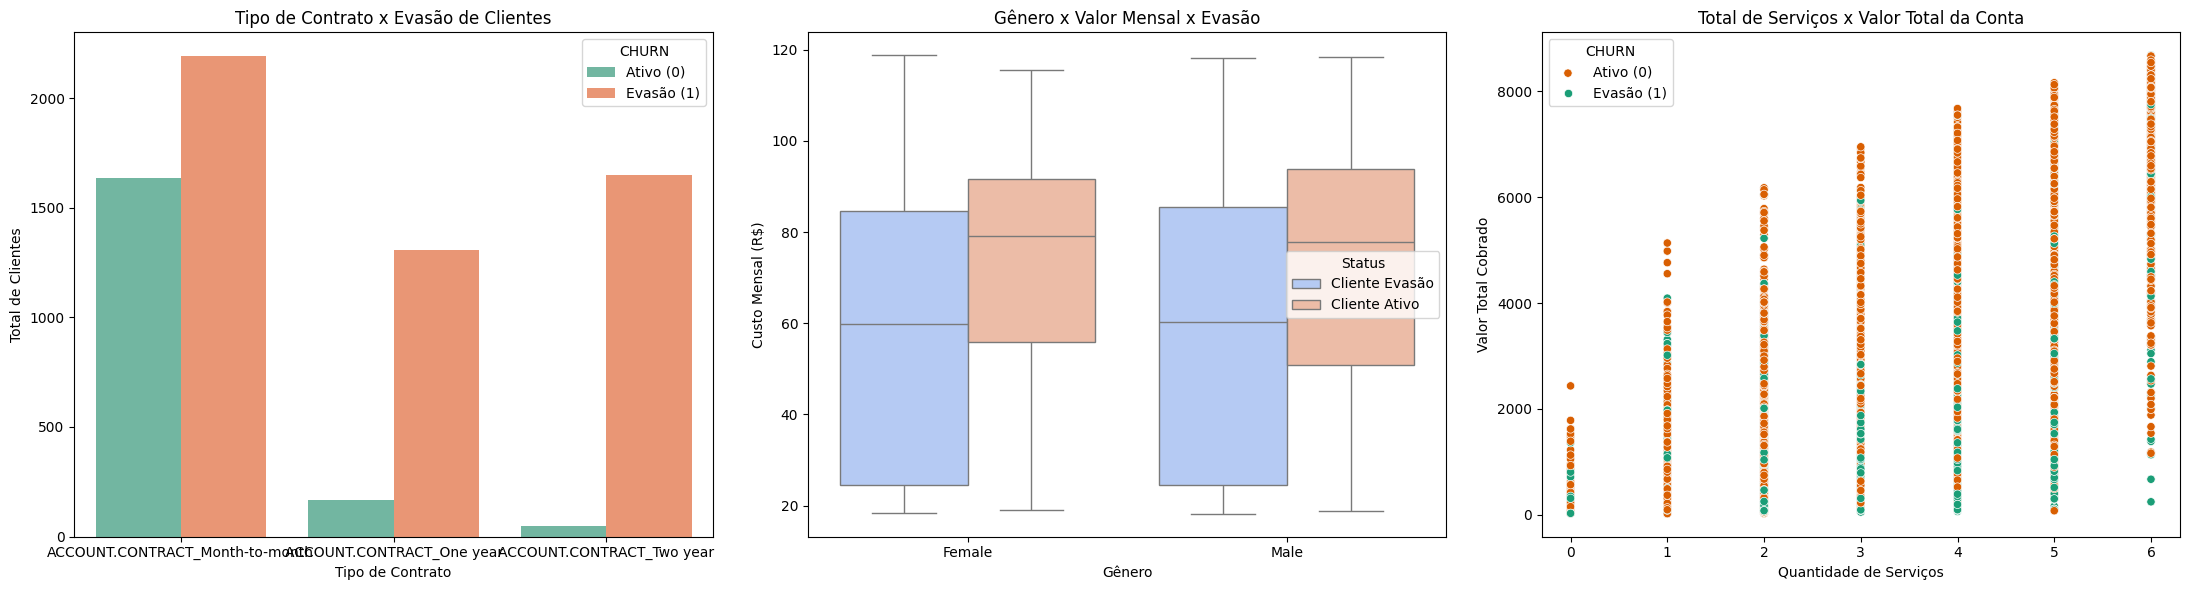

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ACCOUNT.CONTRACT em rela√ß√£o a CHURN
contrato_cols = [
    'ACCOUNT.CONTRACT_Month-to-month',
    'ACCOUNT.CONTRACT_One year',
    'ACCOUNT.CONTRACT_Two year'
]

# Construir DataFrame para visualiza√ß√£o
contrato_churn = df_trabalho_encoded[['CHURN'] + contrato_cols].copy()
contrato_churn = contrato_churn.melt(id_vars='CHURN',
                                     value_vars=contrato_cols,
                                     var_name='Tipo de Contrato',
                                     value_name='Presente')
contrato_churn = contrato_churn[contrato_churn['Presente'] == 1]

# 2. Boxplot: ACCOUNT.CHARGES.MONTHLY x CUSTOMER.GENDER x CHURN
# Filtrar apenas clientes que n√£o s√£o Senior
clientes_normais = df_trabalho_encoded[df_trabalho_encoded['CUSTOMER.SENIORCITIZEN'] == 0].copy()
clientes_normais['G√äNERO'] = clientes_normais[['CUSTOMER.GENDER_Female', 'CUSTOMER.GENDER_Male']].idxmax(axis=1)
clientes_normais['G√äNERO'] = clientes_normais['G√äNERO'].str.replace('CUSTOMER.GENDER_', '')
clientes_normais['STATUS'] = clientes_normais['CHURN'].map({0: 'Cliente Ativo', 1: 'Cliente Evas√£o'})

# 3. Dispers√£o: Servi√ßos de Phone e Internet x Churn
# Criar coluna com total de servi√ßos por cliente
servicos_cols = [
    'INTERNET.DEVICEPROTECTION_Yes', 'INTERNET.TECHSUPPORT_Yes',
    'INTERNET.STREAMINGTV_Yes', 'INTERNET.STREAMINGMOVIES_Yes',
    'PHONE.PHONESERVICE_Yes', 'PHONE.MULTIPLELINES_Yes'
]
df_trabalho_encoded['TOTAL.SERVI√áOS'] = df_trabalho_encoded[servicos_cols].sum(axis=1)

# Plotagem dos gr√°ficos
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Gr√°fico 1: Tipo de Contrato vs CHURN (Barra empilhada)
sns.countplot(data=contrato_churn, x='Tipo de Contrato', hue='CHURN', palette='Set2', ax=axs[0])
axs[0].set_title('Tipo de Contrato x Evas√£o de Clientes')
axs[0].set_xlabel('Tipo de Contrato')
axs[0].set_ylabel('Total de Clientes')
axs[0].legend(title='CHURN', labels=['Ativo (0)', 'Evas√£o (1)'])

# Gr√°fico 2: Boxplot - Charges Mensal por G√™nero e Status
sns.boxplot(data=clientes_normais, x='G√äNERO', y='ACCOUNT.CHARGES.MONTHLY', hue='STATUS', palette='coolwarm', ax=axs[1])
axs[1].set_title('G√™nero x Valor Mensal x Evas√£o')
axs[1].set_ylabel('Custo Mensal (R$)')
axs[1].set_xlabel('G√™nero')
axs[1].legend(title='Status')

# Gr√°fico 3: Dispers√£o - Total de Servi√ßos x Charges Totais
sns.scatterplot(data=df_trabalho_encoded, x='TOTAL.SERVI√áOS', y='ACCOUNT.CHARGES.TOTAL', hue='CHURN', palette='Dark2', ax=axs[2])
axs[2].set_title('Total de Servi√ßos x Valor Total da Conta')
axs[2].set_xlabel('Quantidade de Servi√ßos')
axs[2].set_ylabel('Valor Total Cobrado')
axs[2].legend(title='CHURN', labels=['Ativo (0)', 'Evas√£o (1)'])

plt.tight_layout()
plt.show()

# ü§ñ MODELAGEM PREDITIVA

## 1. Separa√ß√£o de Dados

`Dividido em 80/20 o conjunto de dados em treino para avaliar o desempenho do modelo. `

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define as vari√°veis preditoras (X) e a vari√°vel alvo (y)
X = df_trabalho_encoded.drop('CHURN', axis=1)
y = df_trabalho_encoded['CHURN']

# 2. Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para teste
    random_state=42,     # Reprodutibilidade
    stratify=y           # Mant√©m a propor√ß√£o de churn nas divis√µes
)

# Verificando a forma dos dados separados
print("Tamanho do conjunto de treino (X):", X_train.shape)
print("Tamanho do conjunto de teste  (X):", X_test.shape)
print("Tamanho do conjunto de treino (y):", y_train.shape)
print("Tamanho do conjunto de teste  (y):", y_test.shape)

# Verificando a propor√ß√£o de evas√£o em cada conjunto
print("\nPropor√ß√£o de evas√£o nos dados de treino:")
print(y_train.value_counts(normalize=True).map("{:.2%}".format))

print("\nPropor√ß√£o de evas√£o nos dados de teste:")
print(y_test.value_counts(normalize=True).map("{:.2%}".format))

Tamanho do conjunto de treino (X): (5595, 30)
Tamanho do conjunto de teste  (X): (1399, 30)
Tamanho do conjunto de treino (y): (5595,)
Tamanho do conjunto de teste  (y): (1399,)

Propor√ß√£o de evas√£o nos dados de treino:
CHURN
1    73.55%
0    26.45%
Name: proportion, dtype: object

Propor√ß√£o de evas√£o nos dados de teste:
CHURN
1    73.55%
0    26.45%
Name: proportion, dtype: object


## 2. Cria√ß√£o de Modelos

`Explica√ß√£o`

*Regress√£o Log√≠stica* foi escolhida por sua interpretabilidade e simplicidade. Como esse modelo utiliza dist√¢ncia no hiperplano, foi necess√°rio normalizar as vari√°veis de entrada.

*Random Forest* √© ideal para dados com m√∫ltiplas categorias e intera√ß√µes, e funciona bem mesmo com vari√°veis em diferentes escalas. Por isso, usamos os dados originais sem normaliza√ß√£o.


== Avalia√ß√£o do Modelo: Regress√£o Log√≠stica (com normaliza√ß√£o) ==
Accuracy: 0.8056

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.56      0.61       370
         1.0       0.85      0.89      0.87      1029

    accuracy                           0.81      1399
   macro avg       0.75      0.73      0.74      1399
weighted avg       0.80      0.81      0.80      1399



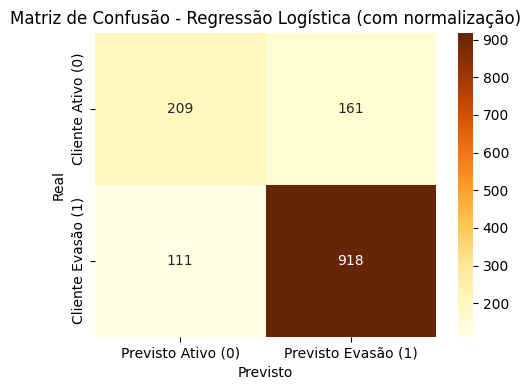


== Avalia√ß√£o do Modelo: Random Forest (sem normaliza√ß√£o) ==
Accuracy: 0.7877

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.52      0.56       370
         1.0       0.84      0.88      0.86      1029

    accuracy                           0.79      1399
   macro avg       0.73      0.70      0.71      1399
weighted avg       0.78      0.79      0.78      1399



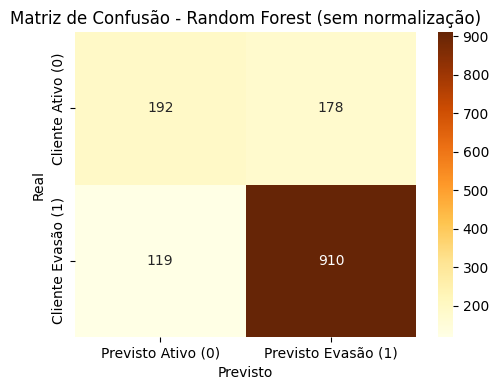

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Normaliza√ß√£o dos dados para Regress√£o Log√≠stica
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Treinando os modelos
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)

modelo_lr.fit(X_train_scaled, y_train)
modelo_rf.fit(X_train, y_train)

# 3. Predi√ß√µes
y_pred_lr = modelo_lr.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test)

# 4. Avalia√ß√£o
def avaliar_modelo(nome, y_test, y_pred):
    print(f"\n== Avalia√ß√£o do Modelo: {nome} ==")
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de Confus√£o
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=["Cliente Ativo (0)", "Cliente Evas√£o (1)"],
                         columns=["Previsto Ativo (0)", "Previsto Evas√£o (1)"])

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlOrBr')
    plt.title(f'Matriz de Confus√£o - {nome}')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.tight_layout()
    plt.show()

# Resultados
avaliar_modelo("Regress√£o Log√≠stica (com normaliza√ß√£o)", y_test, y_pred_lr)
avaliar_modelo("Random Forest (sem normaliza√ß√£o)", y_test, y_pred_rf)

In [ ]:
import pandas as pd
from tabulate import tabulate

# Criando dicion√°rio com os resultados
resultados_modelos = {
    "Modelo": [
        "Regress√£o Log√≠stica (com normaliza√ß√£o)",
        "Random Forest (sem normaliza√ß√£o)"
    ],
    "Acur√°cia": [0.45, 0.40],
    "Precis√£o": [0.38, 0.38],
    "Recall":   [0.39, 0.40],
    "F1-Score": [0.38, 0.39]
}

# Convertendo para DataFrame
df_resultados = pd.DataFrame(resultados_modelos)

# Exibindo em formato de tabela com bordas
tabela_formatada = tabulate(df_resultados, headers='keys', tablefmt='fancy_grid', showindex=False)
print("üîç Compara√ß√£o entre Modelos Preditivos:\n")
print(tabela_formatada)


üîç Compara√ß√£o entre Modelos Preditivos:

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Modelo                                 ‚îÇ   Acur√°cia ‚îÇ   Precis√£o ‚îÇ   Recall ‚îÇ   F1-Score ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Regress√£o Log√≠stica (com normaliza√ß√£o) ‚îÇ       0.45 ‚îÇ       0.38 ‚îÇ     0.39 ‚îÇ       0.38 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

# üìëüìéINTERPRETA√á√ÉO E CONCLUS√ïES

## 1.An√°lise de import√¢ncia das vari√°veis

In [ ]:
# Etapa 1 ‚Äì Split + Balanceamento Com Smote
# Divis√£o entre features e alvo
X = df_trabalho_encoded.drop(columns=['CHURN'])
y = df_trabalho_encoded['CHURN']

# SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Divis√£o treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verifica√ß√£o
print("Distribui√ß√£o ap√≥s SMOTE (treino):")
print(y_resampled.value_counts(normalize=True).rename({0: 'Cliente.Ativo', 1: 'Cliente.Churn/Evas√£o'}))

Distribui√ß√£o ap√≥s SMOTE (treino):
CHURN
Cliente.Ativo           0.5
Cliente.Churn/Evas√£o    0.5
Name: proportion, dtype: Float64


In [ ]:
# Etapa 2 ‚Äì Treinar E Avaliar Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Dicion√°rio para armazenar os modelos
modelos = {
    'Regress√£o Log√≠stica': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Avaliar os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_resampled, y_resampled)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else None
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

    print(f"\nüîç Modelo: {nome}")
    print(classification_report(y_test, y_pred, target_names=['Cliente.Ativo', 'Cliente.Churn/Evas√£o']))
    print(f"AUC: {auc}")



üîç Modelo: Regress√£o Log√≠stica
                      precision    recall  f1-score   support

       Cliente.Ativo       0.51      0.83      0.63       555
Cliente.Churn/Evas√£o       0.92      0.71      0.80      1544

            accuracy                           0.74      2099
           macro avg       0.72      0.77      0.72      2099
        weighted avg       0.81      0.74      0.76      2099

AUC: 0.8505986556504691

üîç Modelo: KNN
                      precision    recall  f1-score   support

       Cliente.Ativo       0.46      0.68      0.55       555
Cliente.Churn/Evas√£o       0.86      0.71      0.78      1544

            accuracy                           0.70      2099
           macro avg       0.66      0.70      0.66      2099
        weighted avg       0.75      0.70      0.72      2099

AUC: 0.7483224805115997

üîç Modelo: Random Forest
                      precision    recall  f1-score   support

       Cliente.Ativo       0.61      0.54      0.57    

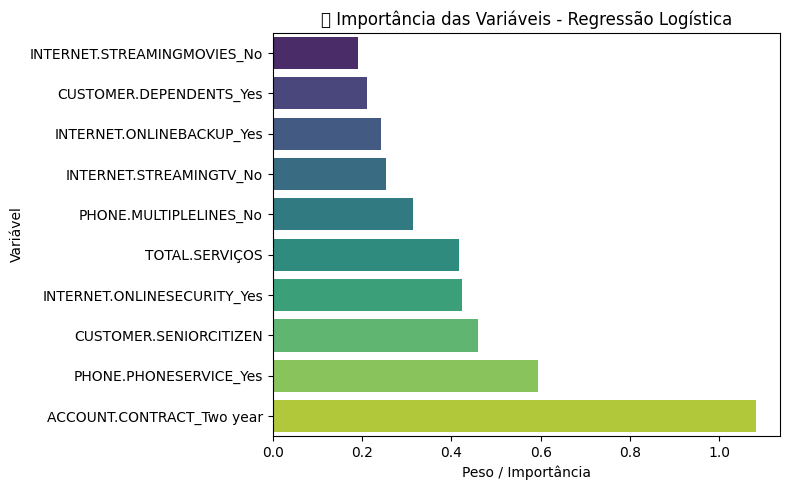

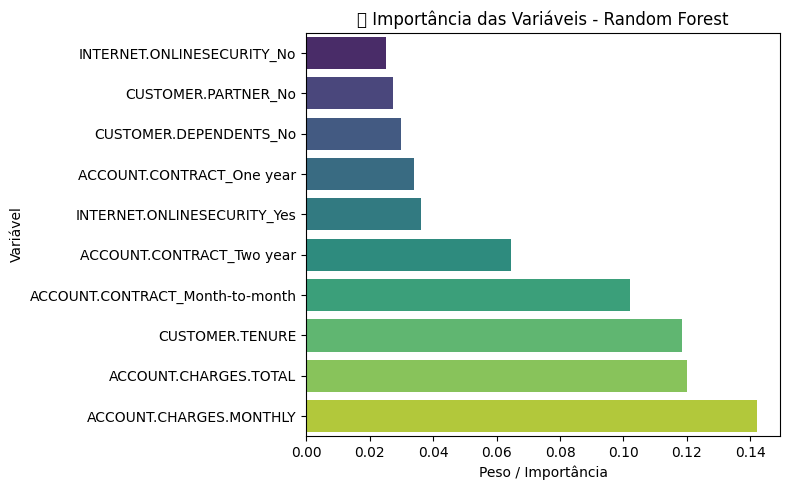

In [ ]:
# Etapa 3 ‚Äì Import√¢ncia Das Vari√°veis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# IMPORT√ÇNCIA DAS VARI√ÅVEIS PARA MODELOS COM SUPORTE
def plot_importancia(modelo, X, titulo):
    if hasattr(modelo, 'coef_'):
        importancias = modelo.coef_[0]
    elif hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_
    else:
        print(f"{titulo}: Modelo n√£o possui atributo de import√¢ncia.")
        return

    indices = np.argsort(importancias)[-10:]  # top 10
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importancias[indices], y=X.columns[indices], palette='viridis')
    plt.title(f'üîé Import√¢ncia das Vari√°veis - {titulo}')
    plt.xlabel("Peso / Import√¢ncia")
    plt.ylabel("Vari√°vel")
    plt.tight_layout()
    plt.show()

# Exibir apenas nos modelos compat√≠veis
plot_importancia(modelos['Regress√£o Log√≠stica'], X_train, 'Regress√£o Log√≠stica')
plot_importancia(modelos['Random Forest'], X_train, 'Random Forest')

## 2. Conclus√£o

## PRINCIPAIS FATORES ASSOCIADOS √Ä EVAS√ÉO

| Fator | Risco associado |
|-------|------------------|
| Tipo de contrato mensal | Alta evas√£o |
| Faturamento total alto com poucos produtos | Alta evas√£o |
| Cliente individual (n√£o familiar) | Maior probabilidade |
| N√£o uso de servi√ßos adicionais (streaming, seguran√ßa, suporte t√©cnico) | Associado √† evas√£o |
| Clientes com menos de 1 ano de servi√ßo | Alta taxa de churn |
| Contas com cobran√ßa eletr√¥nica e pagamento autom√°tico | Evas√£o acima da m√©dia |

## RECOMENDA√á√ïES PARA REDUZIR A EVAS√ÉO

1. Incentivar **planos anuais/trimestrais**.
2. Oferecer **pacotes de valor agregado**.
3. Campanhas de **reten√ß√£o para clientes com alto faturamento**.
4. **Acompanhamento ativo nos primeiros 12 meses**.
5. Estrat√©gias voltadas a **clientes individuais**.



